<a href="https://colab.research.google.com/github/vinita2000/Data-Analytics-with-Pandas/blob/master/TitanicDatasetEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries and dataset - https://www.kaggle.com/datasets/yasserh/titanic-dataset/data
import pandas as pd
data = pd.read_csv('/content/TitanicDataset.csv')

In [ ]:
data.shape
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

,Survived,count
0,No,549
1,Yes,342


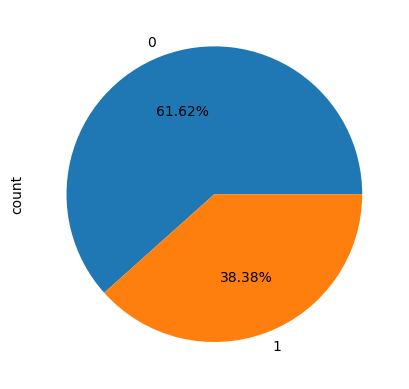

In [2]:
#find the count of survived vs non survived
#METHOD 1
survivedDF = data.groupby('Survived')[['Survived']].value_counts(dropna=False).reset_index(name='count')
survivedDF.loc[survivedDF['Survived'] == 0, 'Survived'] = 'No'
survivedDF.loc[survivedDF['Survived'] == 1, 'Survived'] = 'Yes'
data['Survived'].value_counts().plot(kind='pie', autopct='%0.2f%%')
survivedDF

<Axes: xlabel='Survived'>

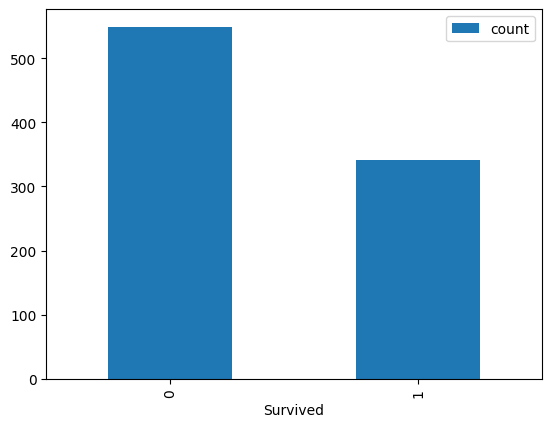

In [3]:
#find the count of survived vs non survived
#METHOD 2
data['Survived'].value_counts(dropna=False).reset_index(name='count').set_index('Survived').plot(kind='bar')

Sex
male      577
female    314
Name: count, dtype: int64

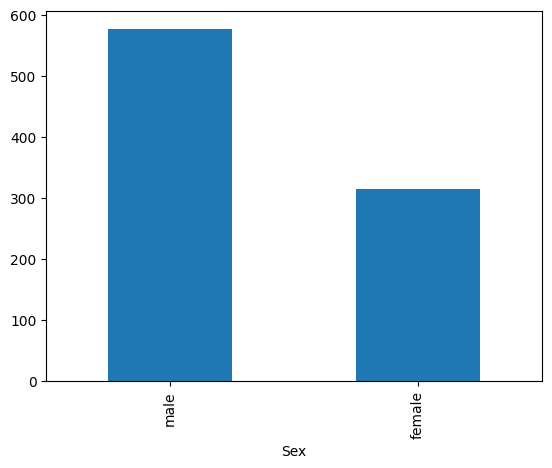

In [4]:
#find the total count of males vs females in titanic
data['Sex'].value_counts(dropna=False).plot(kind='bar')
data['Sex'].value_counts(dropna=False)

In [5]:
#divide and count based on age groups
#0-18, 19-30, 31-50, 51-80, 80+
def ageGrp(age):
  if age<0:
    return 'Invalid age'
  elif age<=18:
    return '0-18'
  elif age>18 and age<=30:
    return '19-30'
  elif age>30 and age<=50:
    return '31-50'
  elif age>50 and age<=80:
    return '51-80'
  elif age>80:
    return '80+'

data['ageGrp'] = data['Age'].apply(ageGrp)
data['ageGrp'].value_counts(dropna=False).reset_index(name='count')
data.columns
survivedByAge = data.groupby(['Survived', 'ageGrp']).size().reset_index(name='Total')
survivedByAge.sort_values(by='ageGrp', ascending=True)

,Survived,ageGrp,Total
0,0,0-18,69
4,1,0-18,70
1,0,19-30,174
5,1,19-30,96
2,0,31-50,139
6,1,31-50,102
3,0,51-80,42
7,1,51-80,22


<Axes: ylabel='count'>

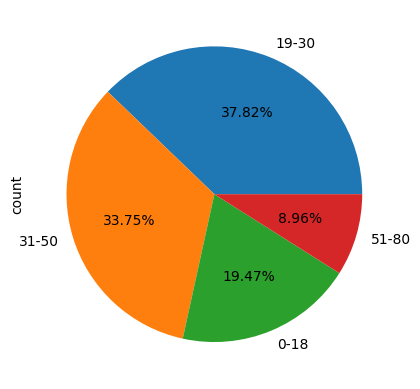

In [6]:
data['ageGrp'].value_counts().plot(kind='pie', autopct='%0.2f%%')

In [7]:
#check missing data in age, name, sex, ticket
#177 Nan values in age -  percentage -  19.87%
ageCount = data['Age'].value_counts(dropna=False).sum()
unknownAge = data['Age'].isna().sum()
unknownAgePer = round((unknownAge/ageCount)*100, 2)
#print(unknownAge, ageCount, f"{unknownAgePer}%", sep='\n')

#no empty names
data['Name'].value_counts(dropna=False)

#no empty cells in sex column
data['Sex'].value_counts(dropna=False)

#no one was travelling without a ticket
data['Ticket'].isna().sum()

0

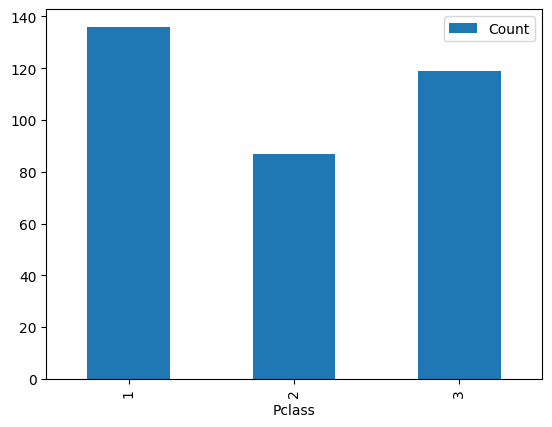

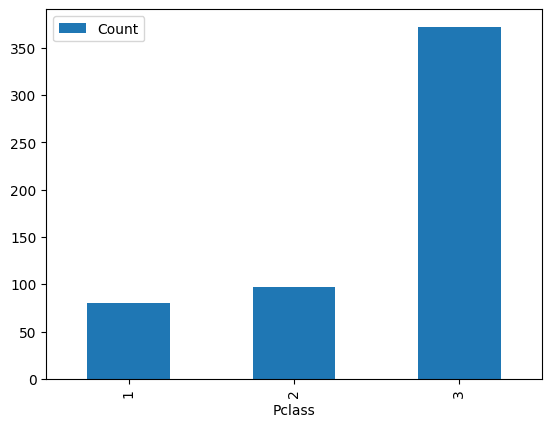

In [8]:
#count class wise passengers
data['Pclass'].value_counts(dropna=False).sort_index(ascending=True)
#find survival rate by Pclass
surByClass= data.groupby(['Survived', 'Pclass']).size().reset_index(name='Count')
# only in first class, more passengers survived than died

survCnt = surByClass.loc[surByClass['Survived'] == 1][['Pclass', 'Count']].set_index('Pclass').plot(kind='bar')
diedCnt = surByClass.loc[surByClass['Survived'] == 0][['Pclass', 'Count']].set_index('Pclass').plot(kind='bar')
#most passengers dies in the third class

<Axes: ylabel='count'>

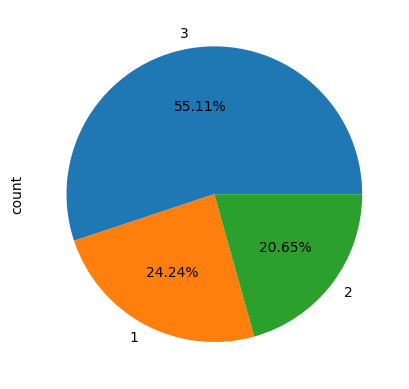

In [ ]:
data['Pclass'].value_counts().plot(kind='pie', autopct='%0.2f%%')

<Axes: ylabel='Density'>

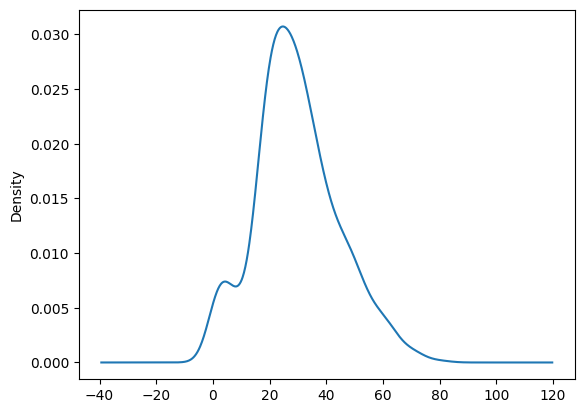

In [ ]:
data['Age'].describe()
data['Age'].plot(kind='kde')

In [ ]:
#how many passengers have their own Cabins
data['Cabin'].isna().sum()
#687 are in the ship without a personal cabin
data['Cabin'].value_counts(dropna=False).sum()
#total = 891, only 891-687 = 204 passengers have their own cabins

891

In [ ]:
data['Fare'].describe()
#min fare is 0
data.loc[data['Fare'] == 0][['Sex']].value_counts(dropna=False)
# 15 men are in the ship without paying any fare - could be the staff memebers/relatives
# No females are travelling without paying ticket prices

Sex 
male    15
Name: count, dtype: int64

In [9]:
#check if any relatives/family is onboard SibSp, Parch
hasRelative = data.loc[(data['SibSp']>0)|(data['Parch']>0)][['PassengerId', 'SibSp', 'Parch']]
hasRelative.head()

,PassengerId,SibSp,Parch
0,1,1,0
1,2,1,0
3,4,1,0
7,8,3,1
8,9,0,2


In [10]:
#lets add a column to data 'TotalFamily' by adding sibSp and Parch for each row
#+1 for the current passenger
data['familySize'] = data['SibSp'] + data['Parch'] + 1
data[['PassengerId', 'SibSp', 'Parch', 'familySize']].sort_values(by='familySize', ascending=False)
# count passengers with max family members(10)
len(data.loc[data['familySize']==data['familySize'].max()][['PassengerId']])
#therefore 7 passengers have brought 11(including themselves) family members

7

<Axes: xlabel='familySize'>

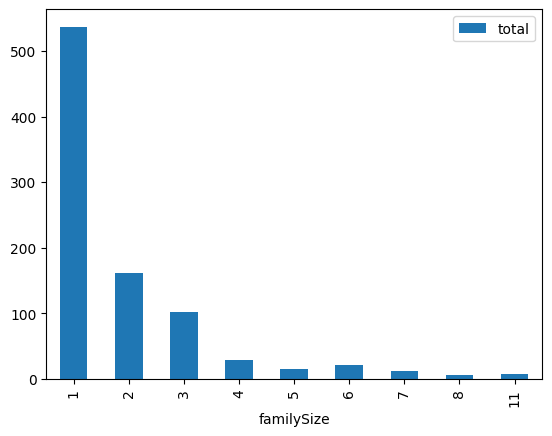

In [ ]:
data.familySize.value_counts().reset_index(name='total').sort_values(by='familySize').set_index('familySize').plot(kind='bar')

In [15]:
# lets find total revenue of the ship
round(data['Fare'].sum(), 2)
round(data['Fare'].agg(['mean', 'min', 'max']), 2)

mean     32.20
min       0.00
max     512.33
Name: Fare, dtype: float64

,Age
Pclass,
1,38.23
2,29.88
3,25.14


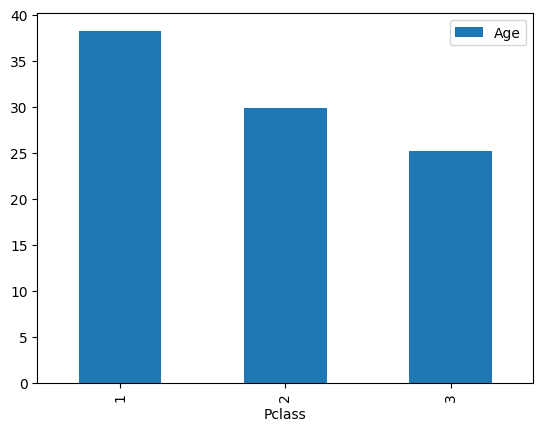

In [21]:
# lets find mean of age in each class
tempDf = round(data.groupby('Pclass')[['Age']].mean(),2)
tempDf.plot(kind='bar')
tempDf.head()

In [12]:
data['Embarked'].value_counts(dropna=False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [11]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ageGrp,familySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,19-30,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,31-50,2


In [38]:
# grouping and counting passengers based on their embarkment stations
def mapPort(code):
  if code == 'C':
    return 'Cherbourg'
  elif code == 'Q':
    return 'Queenstown'
  elif code == 'S':
    return 'Southampton'
  else:
    return 'Unknown'

startStation = data.groupby(['ageGrp', 'Embarked', 'Sex'])[['ageGrp', 'Embarked', 'Sex']].value_counts(dropna=False).reset_index(name='Total')
startStation['Embarked'] = startStation['Embarked'].apply(mapPort)
startStation.tail()

,ageGrp,Embarked,Sex,Total
18,51-80,Cherbourg,female,6
19,51-80,Cherbourg,male,9
20,51-80,Queenstown,male,3
21,51-80,Southampton,female,10
22,51-80,Southampton,male,35


In [46]:
#lets find if we have anyone called 'Rose' or 'Jack' aboard
data['Name'].str.contains('rose').value_counts()
data.loc[data['Name'].str.contains('Rose', case=False)]
# we were looking for a Miss not a Mrs I guess

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ageGrp,familySize
72,73,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.50,NaN,S,19-30,1
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.35,NaN,S,0-18,2


In [47]:
#lets try finding Jack(male)
data.loc[data['Name'].str.contains('jack', case=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ageGrp,familySize
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6,NaN,C,None,1
